# `classification.GLMNetCVClassifier`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import slickml

print(f"Loaded SlickML Version = {slickml.__version__}")

Loaded SlickML Version = 0.2.1


In [3]:
from slickml.classification import GLMNetCVClassifier

help(GLMNetCVClassifier)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Help on class GLMNetCVClassifier in module slickml.classification._glmnet:

class GLMNetCVClassifier(sklearn.base.BaseEstimator, sklearn.base.ClassifierMixin)
 |  GLMNetCVClassifier(alpha: Optional[float] = 0.5, n_lambda: Optional[int] = 100, n_splits: Optional[int] = 3, metric: Optional[str] = 'auc', scale: Optional[bool] = True, sparse_matrix: Optional[bool] = False, fit_intercept: Optional[bool] = True, cut_point: Optional[float] = 1.0, min_lambda_ratio: Optional[float] = 0.0001, tolerance: Optional[float] = 1e-07, max_iter: Optional[int] = 100000, random_state: Optional[int] = 1367, lambda_path: Union[List[float], numpy.ndarray, pandas.core.series.Series, NoneType] = None, max_features: Optional[int] = None) -> None
 |  
 |  GLMNet CV Classifier.
 |  
 |  This is wrapper using GLM-Net [glmnet-api]_ to train a Regularized Linear Model via logitic regression and
 |  find the optimal penalty values through N-Folds cross validation. In principle, GLMNet (also known
 |  as ElasticNet) c

### Example 1: `GLMNetCVClassifer` mode for `breast-cancer` data set

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    shuffle=True,
    stratify=y,
)

In [5]:
clf = GLMNetCVClassifier(
    alpha=0.9,
    n_splits=10,
    metric="auc",
)
clf.fit(X_train, y_train)

In [6]:
# pred proba (or clf.y_pred_proba_)
# y_test in optional
y_pred_proba = clf.predict_proba(X_test)
y_pred_proba[:10]

array([9.16560635e-01, 6.78017657e-02, 9.15372369e-01, 1.97947751e-02,
       9.84280875e-01, 9.99015319e-01, 6.91628921e-15, 1.28892201e-02,
       1.15926081e-01, 9.99806104e-01])

In [7]:
# pred class (or clf.y_pred_)
# threshold can be set
y_pred = clf.predict(X_test, threshold=0.67)
y_pred[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 1])

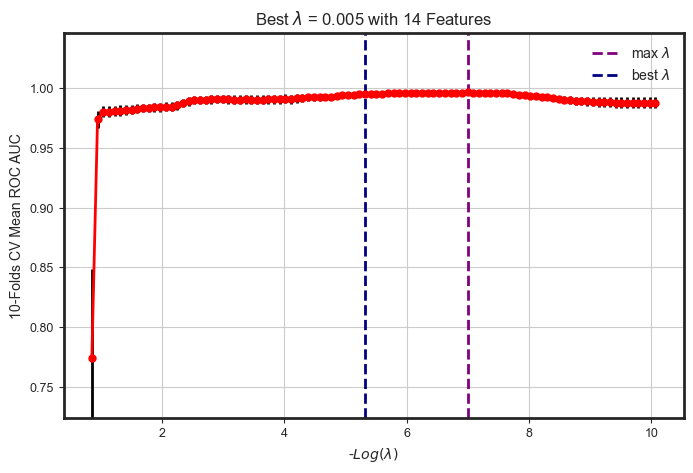

In [8]:
# plot cv_results
clf.plot_cv_results()

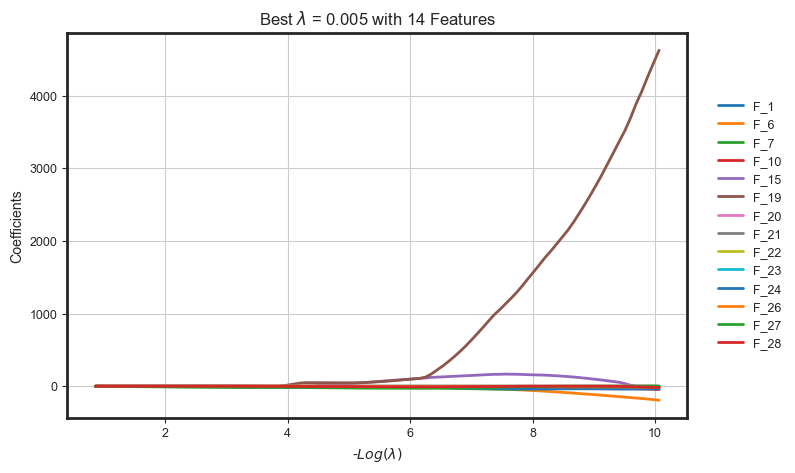

In [9]:
# plot coeff_paths
clf.plot_coeff_path()

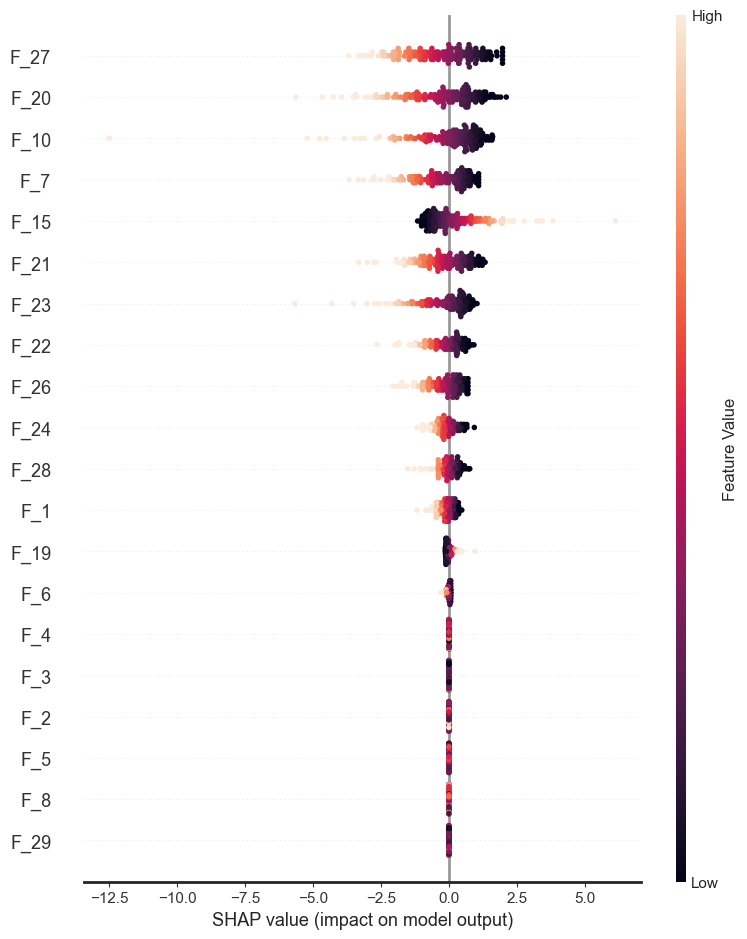

In [10]:
clf.plot_shap_summary()

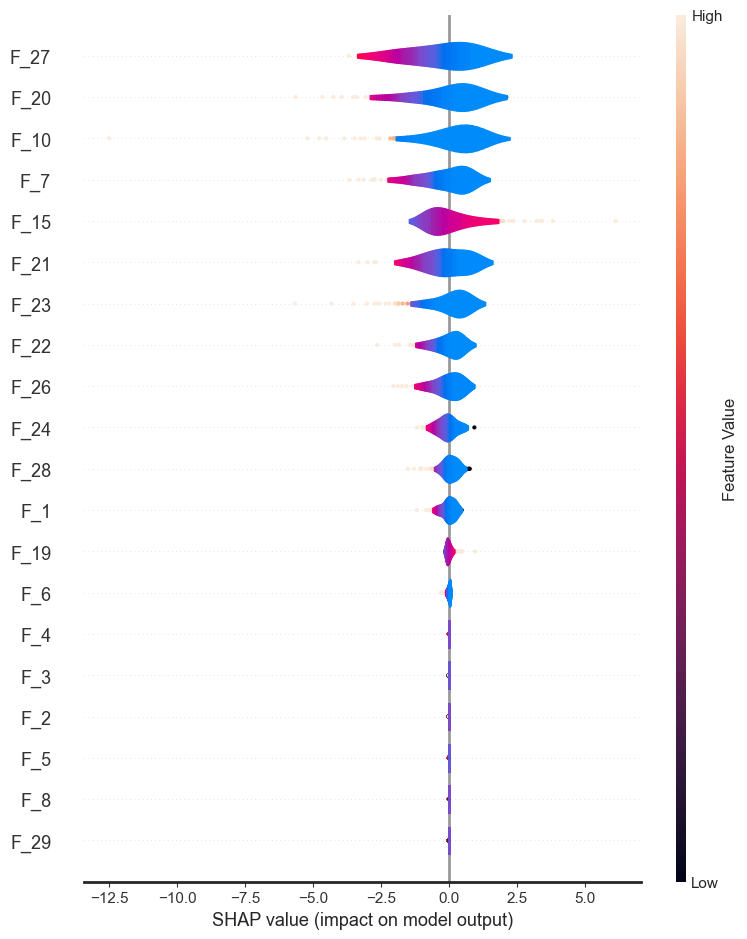

In [11]:
# shap summary plot violin on test data
clf.plot_shap_summary(plot_type="violin", validation=True)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/shap/plots/_beeswarm.py:863: RuntimeWarning: invalid value encountered in divide
  y = ys[i, :] / scale


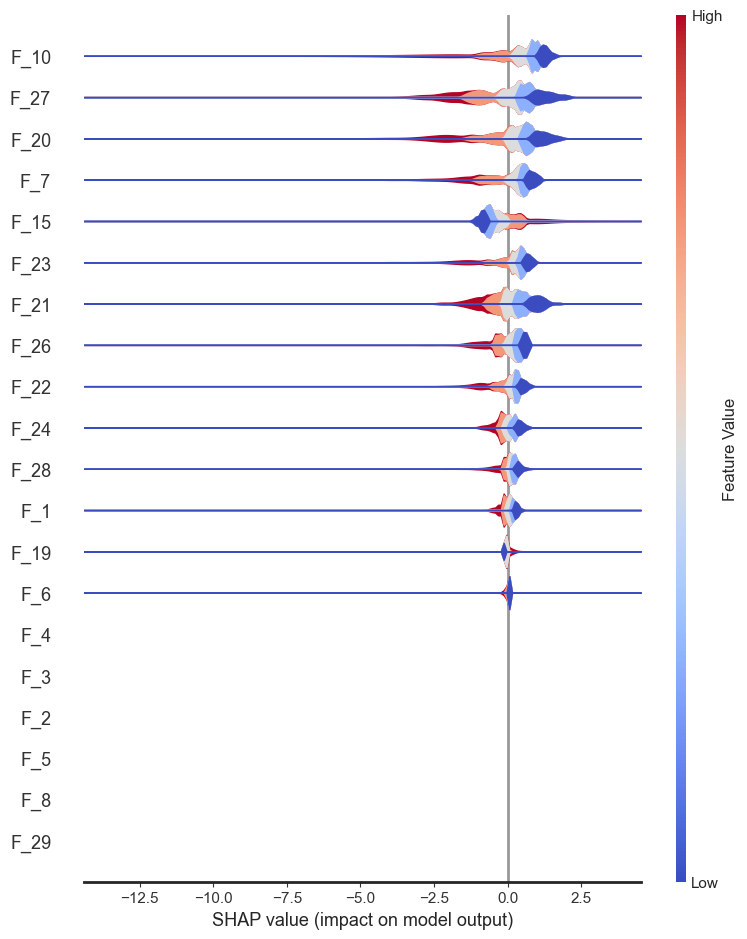

In [12]:
# shap summary plot layered violin plot on train data
clf.plot_shap_summary(
    plot_type="layered_violin",
    validation=False,
    layered_violin_max_num_bins=5,
)

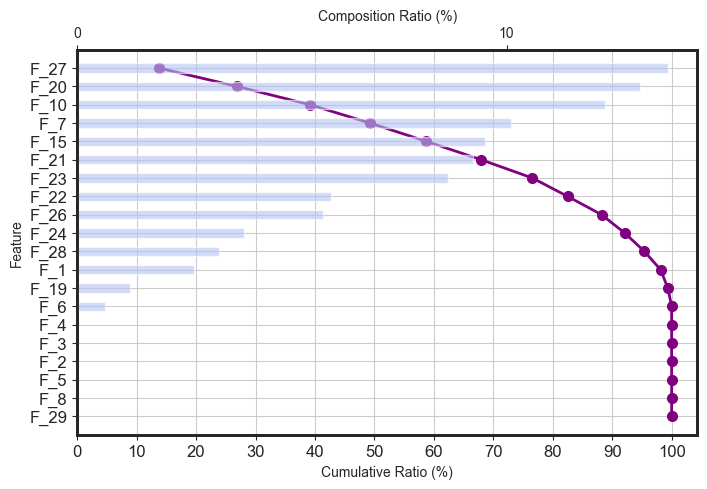

In [13]:
# shap waterfall plot
clf.plot_shap_waterfall()

In [14]:
# non-zero coeffs (or clf.get_coeffs())
clf.coeff_

,feature,coeff
0,F_15,55.318376
1,F_19,53.386824
2,F_23,-0.001649
3,F_22,-0.017779
4,F_1,-0.058103
5,F_21,-0.136243
6,F_20,-0.275615
7,F_6,-0.859020
8,F_26,-2.867105
9,F_28,-5.705764


In [15]:
# intercept (or clf.get_intercept())
clf.intercept_

21.6959980963919

In [16]:
# model cv_results_ (or clf.get_cv_results())
clf.cv_results_

,F_0_coeff_path,F_1_coeff_path,F_2_coeff_path,F_3_coeff_path,F_4_coeff_path,F_5_coeff_path,F_6_coeff_path,F_7_coeff_path,F_8_coeff_path,F_9_coeff_path,...,F_24_coeff_path,F_25_coeff_path,F_26_coeff_path,F_27_coeff_path,F_28_coeff_path,F_29_coeff_path,intercept_path,lambda_path,cv_standard_error,cv_mean_score
0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524249,0.424597,0.074693,0.074693
1,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-1.377834,0.000000,0.000000,0.850388,0.386877,0.006904,0.006904
2,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.449570,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.232511,0.000000,0.000000,1.200685,0.352508,0.004613,0.004613
3,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.063940,0.000000,0.000000,...,0.000000,0.000000,0.000000,-2.995426,0.000000,0.000000,1.522344,0.321192,0.004503,0.004503
4,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-1.629622,0.000000,0.000000,...,0.000000,0.000000,0.000000,-3.738810,0.000000,0.000000,1.831046,0.292658,0.004274,0.004274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.182065,-0.120543,0.0,0.0,-191.698430,239.231891,-162.886052,0.000000,-17.212593,-344.717735,...,-39.024960,3.372755,-10.757973,0.000000,-8.385165,-380.478744,112.942760,0.000062,0.004589,0.004589
96,0.215049,-0.138076,0.0,0.0,-200.441173,247.753977,-168.950912,0.000000,-15.679809,-360.702292,...,-38.302138,3.638088,-11.253407,0.000000,-10.370528,-394.320958,117.039069,0.000056,0.004589,0.004589
97,0.262448,-0.161109,0.0,0.0,-210.542350,258.559779,-176.377703,0.000000,-13.640681,-381.200139,...,-37.834169,3.460402,-11.446659,0.000000,-13.055703,-408.768812,121.834795,0.000051,0.004605,0.004605
98,0.319423,-0.187363,0.0,0.0,-220.658623,269.921897,-184.066940,0.000000,-11.238568,-403.600871,...,-37.461976,3.013396,-11.467827,0.000000,-16.154353,-421.314187,126.618303,0.000047,0.004605,0.004605


In [17]:
# total model results json (or clf.get_results())
clf.results_.keys()

dict_keys(['coeff', 'coeff_path', 'cv_standard_error', 'cv_mean_score', 'lambda_path', 'lambda_best', 'lambda_max', 'n_lambda', 'intercept', 'intercept_path', 'params', 'module'])

In [18]:
# model's fitting params (or clf.get_params())
clf.params_

{'alpha': 0.9,
 'cut_point': 1.0,
 'fit_intercept': True,
 'lambda_path': None,
 'lower_limits': -inf,
 'max_features': None,
 'max_iter': 100000,
 'min_lambda_ratio': 0.0001,
 'n_jobs': -1,
 'n_lambda': 100,
 'n_splits': 10,
 'random_state': 1367,
 'scoring': 'roc_auc',
 'standardize': True,
 'tol': 1e-07,
 'upper_limits': inf,
 'verbose': False}

In [19]:
clf.model_

LogitNet(alpha=0.9, n_jobs=-1, n_splits=10, random_state=1367,
         scoring='roc_auc')

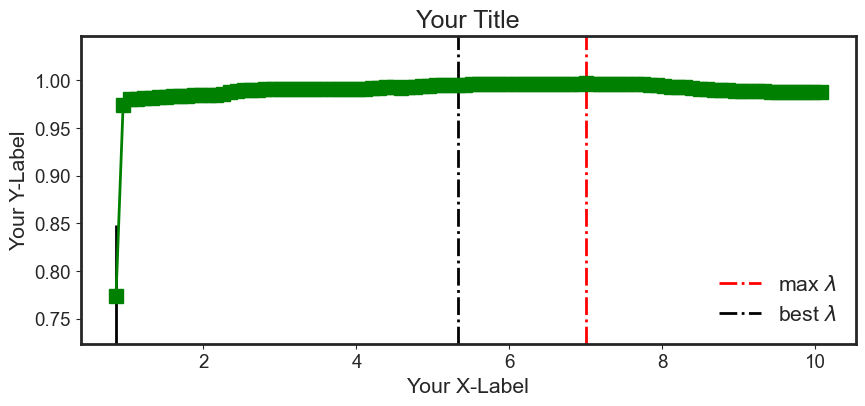

In [20]:
# plot cv_results -> try customizing it with your favorite style
clf.plot_cv_results(
    figsize=(10, 4),
    marker="s",
    markersize=10,
    color="green",
    maxlambdacolor="red",
    bestlambdacolor="black",
    linestyle="-.",
    fontsize=18,
    grid=False,
    legend=True,
    legendloc=4,
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    save_path=None,
)

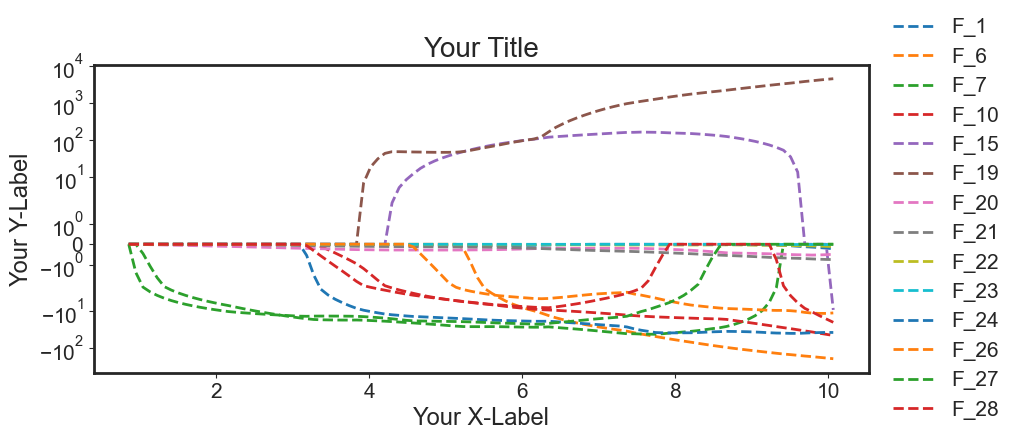

In [21]:
# plot coeff_paths --> try customizing it with your favorite style
clf.plot_coeff_path(
    figsize=(10, 4),
    linestyle="--",
    fontsize=20,
    grid=False,
    legend=True,
    legendloc="center",
    xlabel="Your X-Label",
    ylabel="Your Y-Label",
    title="Your Title",
    bbox_to_anchor=(1.1, 0.5),
    yscale="symlog",
    save_path=None,
)

## You can use the `BinaryClassificationMetrics` class to evaluate your model

In [22]:
from slickml.metrics import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(y_test, y_pred_proba)

/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_ranking.py:993: FutureWarning: probas_pred was deprecated in version 1.5 and will be removed in 1.7.Please use ``y_score`` instead.
  warnings.warn(


,Accuracy,Balanced Accuracy,ROC AUC,PR AUC,Precision,Recall,Average Precision,F-1 Score,F-2 Score,F-0.50 Score,Threat Score,TP,TN,FP,FN
Threshold = 0.500 | Average = Binary,0.988000,0.984000,0.997000,0.998000,0.982000,1.000000,0.998000,0.991000,0.996000,0.985000,0.982000,107,62,2,0


/Users/amirhessam/Desktop/GitHub/slick-ml/.venv/lib/python3.9/site-packages/numpy/core/function_base.py:158: RuntimeWarning: invalid value encountered in multiply
  y *= step


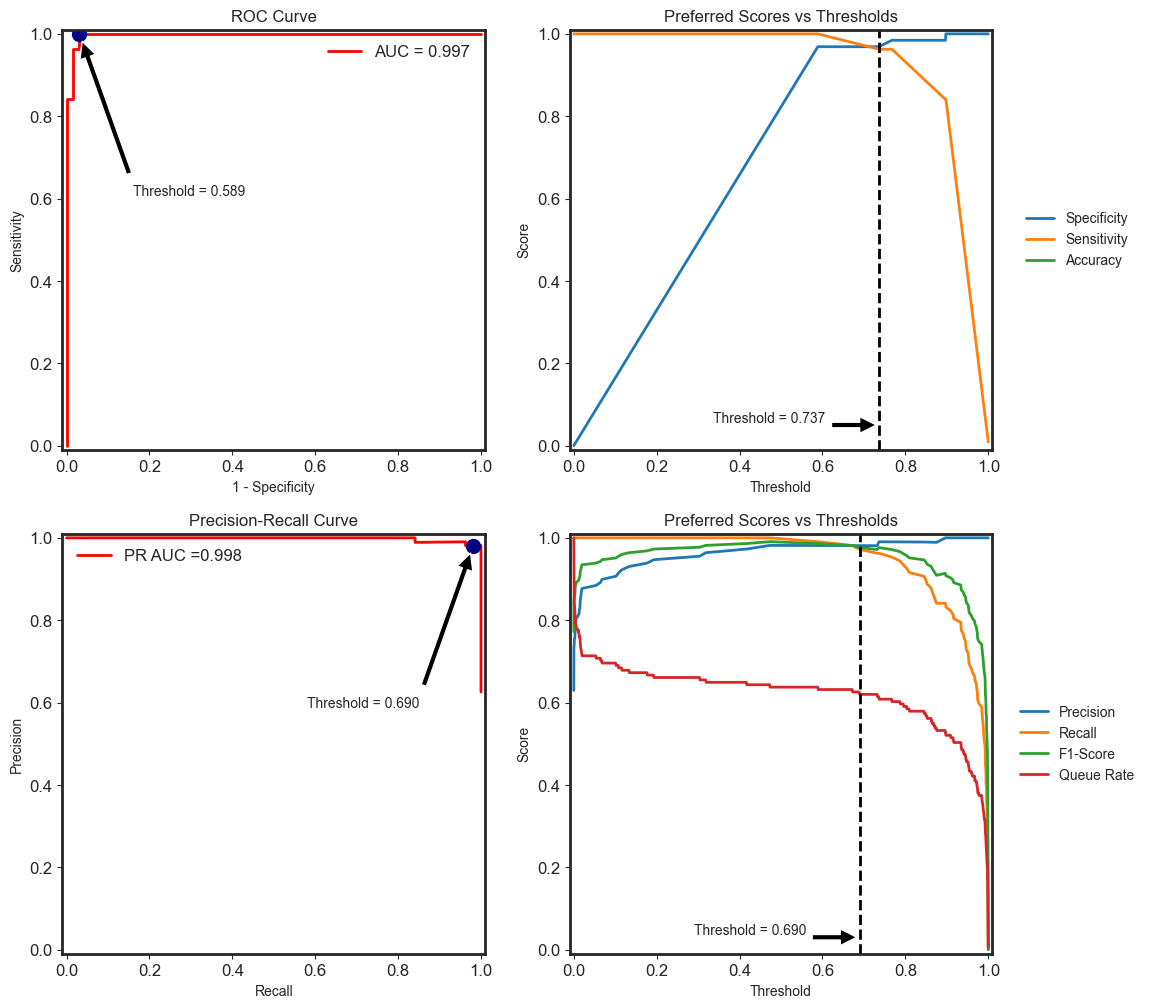

In [23]:
metrics.plot()

### Feel free to add your favorite `Example` via a `pull-request`.
### More details can be found in our [Contributing Document](https://github.com/slickml/slick-ml/blob/master/CONTRIBUTING.md).